** -----------------------------Classification avec des reseaux de neurones  entierement connectes------------------------ ÃÅ**

In [351]:
from sklearn.datasets import make_circles,make_blobs
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch import nn
from sklearn.svm import SVC
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



**1 -Binary Classification with fully conected neural network**


connectes**

**1.1 Dataset preparation** 
--------------------------

In [363]:
X,Y=make_circles(n_samples=100,noise=0.03,random_state=43)

In [364]:
print(f"the generated samples:{X} \n and the target {Y}")

the generated samples:[[-0.85359827  0.60320912]
 [ 0.99413689  0.27745009]
 [-0.32781152  0.96029445]
 [-0.92962032  0.38887051]
 [ 0.52328506  0.61911898]
 [ 0.28487315 -0.72885904]
 [-0.57984861  0.52679451]
 [ 0.63913833  0.43125145]
 [ 0.17774815  0.99746331]
 [-0.63837356 -0.41578422]
 [ 0.42506007  0.87598298]
 [ 0.06001353 -1.00473869]
 [-0.22222683 -0.73162163]
 [ 1.00488454 -0.00343476]
 [ 0.1854991  -0.78043605]
 [-0.01729727  0.94900577]
 [ 0.86247612  0.56925342]
 [ 0.95952272  0.12399063]
 [ 0.61230252 -0.45316002]
 [-0.44254075 -0.66684169]
 [ 0.69964847 -0.69122019]
 [ 0.06569847  0.9923752 ]
 [-0.69607312 -0.27692532]
 [ 0.58928516 -0.60333331]
 [-0.05144484 -0.96094252]
 [ 0.40796228 -0.68141298]
 [ 0.65304899 -0.33186843]
 [ 0.52065372  0.55076133]
 [-0.05473942  0.79524689]
 [ 0.86319806 -0.45117958]
 [ 0.4988427   0.84210419]
 [-0.51793512 -0.8497097 ]
 [ 0.80629314 -0.61253764]
 [-0.73901771  0.70609763]
 [-0.24796518  0.97754638]
 [ 0.49241274 -0.61851979]
 [-0.7

In [192]:
print(f"dimension d'entr√©e {np.shape(X)} \ndimension de sortie {np.shape(Y)}")

dimension d'entr√©e (1000, 2) 
dimension de sortie (1000,)


Text(0, 0.5, 'feature 2')

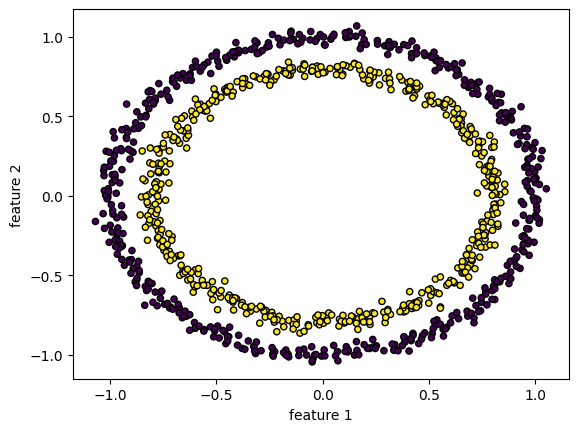

In [193]:
##Data VIZ
plt.scatter(X[:,0],X[:,1],s=20,c=Y, edgecolors='k')
plt.xlabel("feature 1")
plt.ylabel("feature 2")




---
==> ces donn√©es necessite une fonction non lin√©aire elles ne sont pas s√©parable avec une simple fonction lin√©aire.



---





In [194]:
## transform data from array to torch
X = torch . from_numpy (X) . type ( torch . float )
y = torch . from_numpy (Y) . type ( torch . float )

In [195]:
type(X)

torch.Tensor

In [196]:
##split the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [197]:
print(f"shape of train and test  data\n X_train:{np.shape(X_train)}\n y_train:{np.shape(y_train)}\n X_test:{np.shape(X_test)}\n y_test:{np.shape(y_test)}")

shape of train and test  data
 X_train:torch.Size([800, 2])
 y_train:torch.Size([800])
 X_test:torch.Size([200, 2])
 y_test:torch.Size([200])


**1.2  FCNN classifier** 
--------------------------

In [198]:
##prepare the device
device = " cuda " if torch . cuda . is_available () else "cpu"

In [199]:
class ModelV0 ( nn . Module ):
    def __init__ ( self ) :
        super () . __init__ ()
        # Constructeur pour definir l‚Äô architecture du modele
        self . layer_1 = nn . Linear ( in_features =2 , out_features =5)
        self . layer_2 = nn . Linear ( in_features =5, out_features =1)

        # Propagation des donnees dans le modele
    def forward ( self , x):
        return self . layer_2 ( self . layer_1 (x ))

In [200]:
## create an instance of the model and send it to the execution device
model_0 = ModelV0 () . to ( device )

In [201]:
##print layers using named_children or simply print(model_v0)
for name, layer in model_0.named_children():
    print(name, layer)

layer_1 Linear(in_features=2, out_features=5, bias=True)
layer_2 Linear(in_features=5, out_features=1, bias=True)


------------------------------------------------------------------
**le choix des dimensions d'√©ntr√©e et de sortie du FCNN**

le choix des dimensions n√©cessite une bonne compr√©hension des donn√©es et de la tache vis√©e, pour les donn√©es d'entr√©e elles doivent correspondre au nombre des features de nos donn√©es dans notre cas = 2, et pour les donn√©es de sorties ca d√©pend plutot du task et son objectif souhait√©.

-----------------------------------------------------------------------------------------------------------------------------------
**La couche 1 prend 2 features en entr√©e et produit 5 features en sortie. C‚Äôest ce qu‚Äôon appelle avoir 5 unit√©s cach√©es (neurones).**

cette couche transforme les donn√©es de 2 features √† 5 features pour en d√©gager des motifs plus complexes en fesant des combinaisons non lin√©aires.

-------------------------------------------------------
**Le choix des nombres de neurones par couche cach√©e**
le choix des nombres de neurones par couche est une √©tape tr√©s importante qui a un effet direct sur la performance du mod√©le. 
Ce choix peut etre effectu√©e suivant plusieurs pratiques ::
    

   üòä La connaissance des probl√©mes similaires.

   üòä La compr√©hension des donn√©es permet de nous renseigner sur la complexit√© du probl√©me et par suite le choix des nombres de neurones qui doit etre elev√© si le probl√©me est tr√©s complexes.

   üòäOn peut meme tester plusieurs configurations.



-------------------------------------------------------------
**dans notre mod√©le la couche 2 a 5 feature d'√©ntr√©e**

Tout simplement car la couche cach√©e a 5 features de sortie.

In [202]:
## Define the loss function, and the SGD optimizer
loss_fn = nn . BCEWithLogitsLoss ()
optimizer = torch . optim . SGD ( params = model_0 . parameters () , lr =0.1)

-----------------------------------------------------------------
**Diff√©rence entre  torch.nn.BCELoss() et torch.nn.BCEWithLogitsLoss().**

Ces deux m√©thodes permettent de calculer l'entropie crois√©e binaire.

BCELoss: lorsque les valeurs de sortie du mod√®le sont d√©j√† pass√©es √† travers une fonction sigmo√Øde. (sortie == sont des probabiit√©s)

BCEWithLogitsLoss: lorsque les valeurs de sortie du mod√®le ne sont pas encore pass√©es √† travers une fonction sigmo√Øde. 

**1.3 Model Training** 
--------------------------

In [203]:
## Define the accuracy function
def accuracy_fn ( y_true , y_pred ) :

  cor_pred=(y_true==y_pred).sum().float() ## number of correctly classfifies classes
  accuracy=cor_pred/len(y_true) 

  return accuracy

In [204]:
torch . manual_seed (42)

epochs = 100

 # Envoyer le dataset a l appareil d execution
X_train , y_train = X_train . to ( device ) , y_train . to ( device )
X_test , y_test = X_test . to ( device ) , y_test . to ( device )


for epoch in range ( epochs ):
  ## activate the training mode
  model_0 . train ()

  ## Calculate logits == scores before passing to the sigmoid function
  y_logits = model_0 ( X_train ). squeeze ()

  ## transform logits to probability
  y_pred = torch . round ( torch . sigmoid ( y_logits ))

  ## claculate the loss
  loss = loss_fn ( y_logits , y_train )
  acc = accuracy_fn ( y_true = y_train , y_pred = y_pred )

  ## update the gradient params
  optimizer . zero_grad ()

  loss . backward ()

  ##update weights using gradient in retropropagation
  optimizer . step ()

  ## no more update for weights 
  model_0 . eval ()

  ## activate the inference mode and calculate loss and accuracy for test set
  with torch . inference_mode () :
    test_logits = model_0 ( X_test ) . squeeze ()
    test_pred = torch . round ( torch . sigmoid ( test_logits ))
    test_loss = loss_fn ( test_logits , y_test )
    test_acc = accuracy_fn ( y_true = y_test , y_pred = test_pred )

In [205]:
print(f"loss : {loss} \naccuracy : {acc}\ntest_loss : {test_loss} \ntest_acc : {test_acc}")
print(y_pred)

loss : 0.693220853805542 
accuracy : 0.5137500166893005
test_loss : 0.6943637132644653 
test_acc : 0.5
tensor([1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
        1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
        0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
        1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
        1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
        1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        1., 1., 1

==> le mod√©le n'est pas assez performant et ca c'est du au choix de l'architecture car nos donn√©es sont trops complexes par rapport a l'architecture

**1.3 Model Evaluation** 
--------------------------

In [206]:
def plot_Decision_boundary(X,Y,ax):
  # Create a grid of points to plot the decision boundary
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
  grid = np.c_[xx.ravel(), yy.ravel()]
  grid_tensor = torch.tensor(grid, dtype=torch.float32, device=device)

  # Compute predictions for the grid
  model_0.eval()
  with torch.no_grad():
      pred_grid = model_0(grid_tensor).squeeze().cpu().numpy()
  pred_grid = np.round(1 / (1 + np.exp(-pred_grid)))
  
  # Reshape the predictions to the shape of the grid
  pred_grid = pred_grid.reshape(xx.shape)
  

  # Plot the decision boundary and the data points
  ax.contourf(xx, yy, pred_grid,  alpha=0.6)
  ax.scatter(X[:, 0], X[:, 1], c=Y)
  #ax.show()





Text(0.5, 1.0, 'decision boundary for test set')

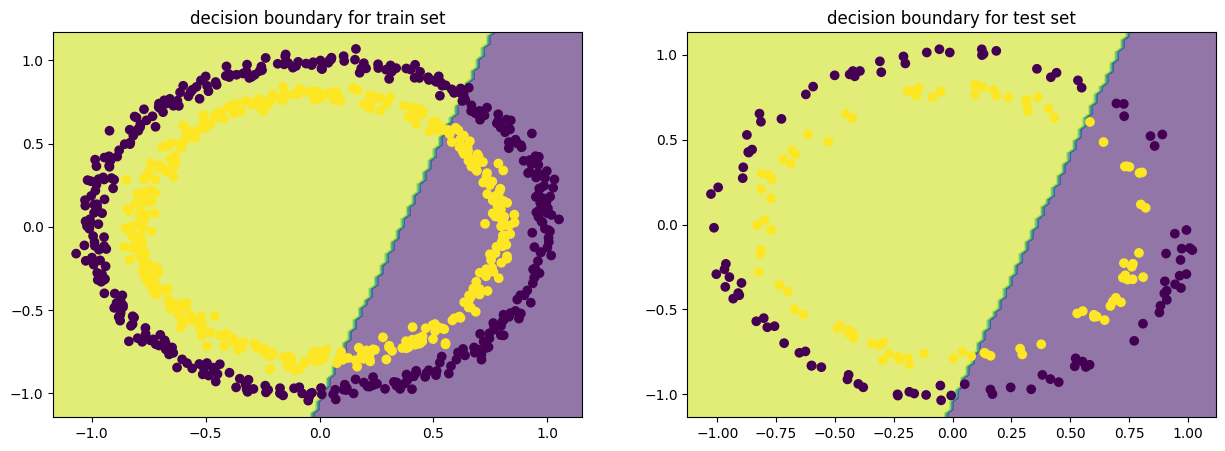

In [207]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
plot_Decision_boundary(X_train,y_train,axes[0])
axes[0].set_title("decision boundary for train set")
plot_Decision_boundary(X_test,y_test,axes[1])
axes[1].set_title("decision boundary for test set")

==> Ce mod√©le est tellement simple qu'il n'a pas put d√©gager des patterns complexes 

-------------------------------------------------------
* il existe plusieurs techniques qui permettent d'am√©liorer la performances du mod√©le:

    * augmentation des donn√©es.
    * r√©glage des hyperparam√©tres.
    * augmenter le nombre des couches
    * augmenter le nombre des neurones par couche
    * ajouter des fonctions d'activation pour eleminer la linearit√©
    * augmenter le nombre d'epochs

In [208]:
class ModelV1 ( nn . Module ):
    def __init__ ( self ) :
        super () . __init__ ()
        # Constructeur pour definir l‚Äô architecture du modele
        self . layer_1 = nn . Linear ( in_features =2 , out_features =5)
        self . layer_2 = nn . Linear ( in_features =5, out_features =1)

        # Propagation des donnees dans le modele
    def forward ( self , x):
         x = F.sigmoid(self.layer_1(x))
         x = F.sigmoid(self.layer_2(x))
         return x



In [209]:
## create an instance of the model and send it to the execution device
model_new = ModelV1 () . to ( device )

**2 Classification multi-classes avec des reseaux de neurones entierement
connectes**

**2.1 Data prep**

In [342]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=4,random_state=42)


In [343]:
X_t = torch.from_numpy(X).type(torch.float)
y_t = torch.from_numpy(y).type(torch.float)

In [344]:

X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

Text(0, 0.5, 'feature 2')

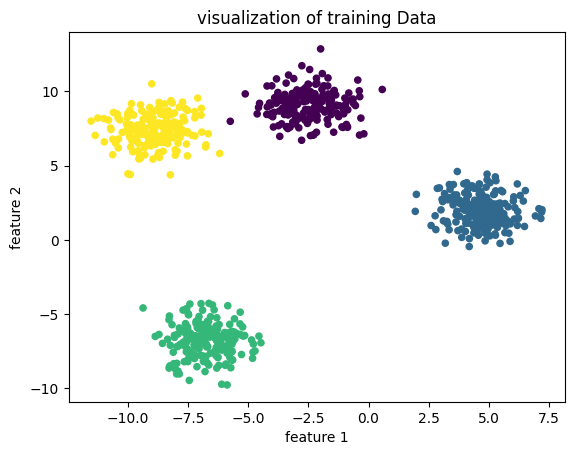

In [346]:
plt.scatter(X_train[:,0],X_train[:,1],s=20,c=y_train)
plt.title('visualization of training Data')
plt.xlabel("feature 1")
plt.ylabel("feature 2")


==> c'est tr√©s claires que ces donn√©es sont tr√©s complexes donc ca necessite 


In [347]:
class ModelV1 ( nn . Module ):
    def __init__ ( self ) :
        super () . __init__ ()
 # Constructeur pour definir l‚Äô architecture du modele
        self . layer_1 = nn . Linear ( in_features =2 , out_features =10)
        self . layer_2 = nn . Linear ( in_features =10 , out_features =4)
       

 # Propagation des donnees dans le modele
    def forward(self, x):
        x = self.layer_1(x)
        ##non linear function
        x = nn.functional.relu(x)
        x = self.layer_2(x)
        return x

In [348]:
model_1 = ModelV1 () . to ( device )

In [349]:
import torch.nn.functional as F
torch.manual_seed(42)
# Define the Loss function
loss_fn = nn.CrossEntropyLoss()
## Define the optimizer
optimizer = optim.Adam(model_1.parameters(), lr=0.01)

# epochs number
n_epochs = 100



for epoch in range(n_epochs):
    # activate training mode
    model_1.train()
    
    # calculate logits
    train_logits = model_1(X_train)

    # loss and accuracy 
    train_loss = loss_fn(train_logits, y_train.long())
    acc = accuracy_fn ( y_true = y_train , y_pred = train_logits.argmax(dim=1) )

     # Update the gradient 
    optimizer.zero_grad()

    # Calulate the gradient using retroprog
    train_loss.backward()

    # update weights
    optimizer.step()

    # mode evaluation
    model_1.eval()

    # logits for test
    test_logits = model_1(X_test)

     # Loss for test
    test_loss = loss_fn(test_logits, y_test.long())
    test_loss=test_loss.item()
    test_acc = accuracy_fn ( y_true = y_test , y_pred = test_logits.argmax(dim=1) )
    test_acc=test_acc.item()
    
    train_loss=train_loss.item()
    acc=acc.item()
    if (epoch + 1) % 10 == 0:
        print ('acc de l',epoch+1,'=',acc*100,'loss =',train_loss)
        print ('test_acc de l epoch',epoch+1,'=',test_acc*100,'loss du test',test_loss)


acc de l 10 = 75.74999928474426 loss = 0.8181198835372925
test_acc de l epoch 10 = 71.49999737739563 loss du test 0.8182851672172546
acc de l 20 = 99.12499785423279 loss = 0.42099764943122864
test_acc de l epoch 20 = 99.50000047683716 loss du test 0.4287424087524414
acc de l 30 = 99.75000023841858 loss = 0.30657467246055603
test_acc de l epoch 30 = 100.0 loss du test 0.3200959861278534
acc de l 40 = 99.87499713897705 loss = 0.2543107271194458
test_acc de l epoch 40 = 100.0 loss du test 0.26730015873908997
acc de l 50 = 99.87499713897705 loss = 0.21543127298355103
test_acc de l epoch 50 = 100.0 loss du test 0.22423581779003143
acc de l 60 = 99.87499713897705 loss = 0.1872210055589676
test_acc de l epoch 60 = 100.0 loss du test 0.19578421115875244
acc de l 70 = 99.87499713897705 loss = 0.16515862941741943
test_acc de l epoch 70 = 100.0 loss du test 0.17336784303188324
acc de l 80 = 99.87499713897705 loss = 0.14591974020004272
test_acc de l epoch 80 = 100.0 loss du test 0.1526568233966827

In [ ]:
y_pred = test_logits.argmax(dim=1)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test,y_pred)


print("Precision = ", precision)
print("Rappel = ", recall)
print("F1 score = ", f1)
print("Confusion matrix = ")
print(confusion)

In [324]:

x1,y1=make_blobs(n_samples=1000, n_features=2, centers=4)

In [325]:
X1= torch . from_numpy (x1) . type ( torch . float )
Y1= torch . from_numpy (y1) . type ( torch . float )

In [326]:
X_train,X_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=60)

Text(0, 0.5, 'feature 2')

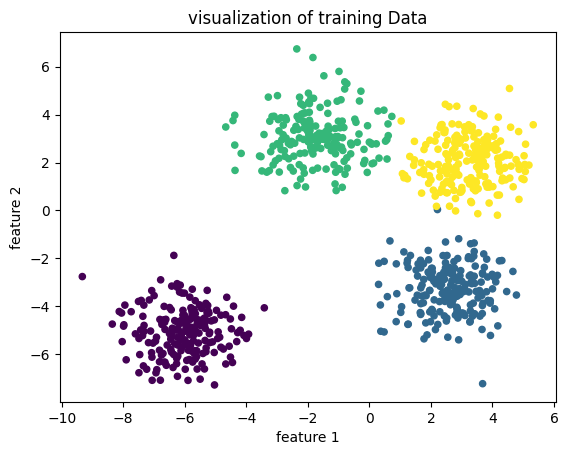

In [329]:
##Data VIZ
plt.scatter(X_train[:,0],X_train[:,1],s=20,c=y_train)
plt.title('visualization of training Data')
plt.xlabel("feature 1")
plt.ylabel("feature 2")

==> c'est tr√©s claires que ces donn√©es sont tr√©s complexes donc ca necessite une fonction non lineaires pour avoir les s√©parer

**Performance Evaluation**

In [352]:
y_pred = test_logits.argmax(dim=1)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test,y_pred)


print(f"Precision : {precision}\n recall : {recall}\n F1 score :{f1}\n confusion matrix:{confusion}")


Precision : 1.0
 recall : 1.0
 F1 score :1.0
 confusion matrix:[[49  0  0  0]
 [ 0 41  0  0]
 [ 0  0 53  0]
 [ 0  0  0 57]]


==> lors de l'evaluation d'un modele c'est necessaire d'utiliser plusieurs m√©triques pour √©valuer le mod√©le ‚ñ∂
  * Pr√©cision : La pr√©cision mesure le nombre de pr√©dictions positives correctes par rapport au nombre total de pr√©dictions positives effectu√©es par le mod√®le. La pr√©cision est utile dans les situations o√π les fausses pr√©dictions positives sont co√ªteuses

  * Rappel : Le rappel mesure le nombre de pr√©dictions positives correctes par rapport au nombre total d'exemples positifs dans les donn√©es. Le rappel est utile dans les situations o√π les fausses pr√©dictions n√©gatives sont co√ªteuses

  * Score F1 : Le score F1 est une mesure combin√©e de la pr√©cision et du rappel qui donne une indication globale de la qualit√© des pr√©dictions. Le score F1 est utile pour les probl√®mes de classification binaire lorsque les deux classes ont la m√™me importance.

  * Matrice de confusion : La matrice de confusion est un tableau qui montre le nombre de pr√©dictions correctes et incorrectes pour chaque classe.

**Decision Boundary**


In [355]:
def plot_dec_boun(X_train,y_train,ax):
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]

    Z = model_1(torch.from_numpy(grid).type(torch.float).to(device)).detach().cpu().numpy()
    Z = np.argmax(Z, axis=1)


    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, alpha=0.4)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')


Text(0.5, 1.0, 'decision boundary for test set')

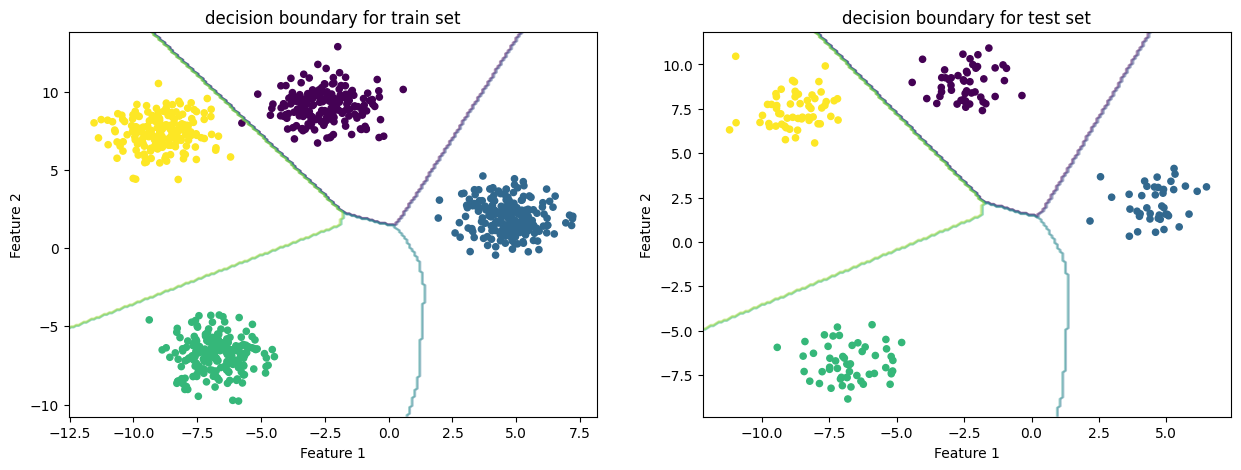

In [358]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
plot_dec_boun(X_train,y_train,axes[0])
axes[0].set_title("decision boundary for train set")
plot_dec_boun(X_test,y_test,axes[1])
axes[1].set_title("decision boundary for test set")

**2.10 l‚Äôimpact de l‚Äôaugmentation du nombre d‚Äô ÃÅechantillons dans le dataset sur l‚Äôexactitude de classification**
L'augmentation du nombre d'√©chantillons dans le dataset peut avoir un impact positif sur l'exactitude de classification de votre mod√®le. 
  * Le mod√©le peut se genraliser
  * R√©duire les effets du overfitting
N√©anmoins elle peut avoir des effets n√©gatifs:
  * Si les echantillons ajout√©es contiennet des des donn√©es  redondantes ou mal √©tiquet√©es

  ==> donc il faut avoir un √©quilibre

**2.11  l‚Äôimpact du choix de l‚Äôoptimiseur, de la fonction de perte et des fonctions d‚Äôactivation sur l‚Äôexactitude de classification.**

  * les optimizers possede  des taux d'apprentissage et des valeurs de momentum diff√©rents, ce qui peut avoir un impact sur la vitesse et la pr√©cision de la convergence du mod√®le.
  *  La fonction de perte est utilis√©e pour calculer l'erreur entre les pr√©dictions du mod√®le et les √©tiquettes r√©elles. Les diff√©rentes fonctions de perte ont des comportements diff√©rents et sont adapt√©es √† diff√©rents types de probl√®mes.
  *  Les fonctions d'activation sont utilis√©es pour introduire de la non-lin√©arit√© dans les mod√®les de r√©seaux de neurones, ce qui peut aider √† mod√©liser des relations complexes entre les caract√©ristiques et les √©tiquettes de classification. 
  ==> Finalement le choix d√©pend de la complexit√© du mod√©le et de l'objectif vis√©

**2.12 les principaux defis li es a l‚Äôutilisation de FCNN dans des applications du monde reel ?**
  * Overfitting
  * temps de calcul 
  * besoin de donn√©es grandes et  de haute qualit√© 
  
**Comment peut-on surmonter ces defis ?**

  * Utilisation des techniques de r√©gularisation
  * Collecte des donn√©es de qualit√©
  * Optimisation des param√©tres(Taux d'apprentissage)

**2.13 Comment peut-on utiliser les modeles de classification bases sur FCNN pour resoudre des problemes du monde r ÃÅeel, tels que la d ÃÅetection de fraudes ou la reconnaissance de visages ?**

les mod√®les de classification bas√©s sur les FCNN peuvent √™tre utilis√©s pour r√©soudre de nombreux probl√®mes du monde r√©el, √† condition de suivre les √©tapes appropri√©es pour collecter, pr√©traiter et entra√Æner les donn√©es, d√©finir le mod√®le, √©valuer ses performances et l'utiliser pour pr√©dire de nouvelles entr√©es,Par exemple, dans la d√©tection des fraudes, le mod√®le peut √™tre form√© sur un grand ensemble de donn√©es de transactions pass√©es pour identifier les mod√®les et les anomalies, puis utilis√© pour d√©tecter les transactions frauduleuses en temps r√©el. En reconnaissance faciale, le mod√®le peut √™tre form√© sur un grand ensemble de donn√©es de visages, puis utilis√© pour identifier des individus dans des images ou des vid√©os.
